# Neural Networks

Hello world example: Classification of IMDB movie reviews

- __Problem statement__: A binary classification problem, where you will classify the movie reviews as positive or negative.
- __Dataset__: IMDB movie review dataset with $50,000$ reviews split between train and test $25000$ each and have $50\%$ positive and $50\%$ negative reviews. where 0 stands for negative and 1 means positive.
- __package__: keras

In [2]:
# load libraries
from keras.datasets import imdb
import numpy as np
from keras import models, layers, optimizers, losses, metrics
import matplotlib.pyplot as plt

In [3]:
# load data
(train_data,train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 2s 0us/step


In [4]:
# take a look of the one row of traning data to have an understanding of how it looks like.
print(f"review: {train_data[0]}\nlabel:{train_labels[0]}")

review: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
label:1


In [5]:
print(f"Review:{test_data[0]}\nLabel:{test_labels[0]}")

Review:[1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]
Label:0


As we see the the variable above that the first element of train and test data, this way of printing one elemnt of a vaeiable is called using index. The interesting thing to look here is that the review is in the form of a numbers because each review in tarin data and test data is vector of word indicies from 1 to 9999. This is called encoding a sequence of word. we can actally convert these indicies to actual human redable word by the following code block. So lets have look what the first review says in human langauge.

In [6]:
# here first we need to get the word indicies and then reverse/decode indicies back to english
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decode_review_train = ' '.join(reverse_word_index.get(i - 3, '?') for i in train_data[0])
decode_review_test = ' '.join(reverse_word_index.get(i - 3, '?') for i in test_data[0])
print(f"Train review:{decode_review_train}\nTest review:{decode_review_test}")

1641221/1641221 [==============================] - 1s 0us/step
Train review:? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these chil

Now, Since we cannot feed the integers to the neural nets we have to turn the list into tensor or in simple 2D vector of shape (samples, word_indices).

In [7]:
# function to covert sequence into vector of same size in this case 10,000
def vector_sequence(sequence, dimension = 10000):
    results = np.zeros((len(sequence), dimension))
    for i, seq in enumerate(sequence):
        results[i, seq] = 1

    return results


x_train = vector_sequence(train_data)
x_test = vector_sequence(test_data)

In [8]:
# vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
# Now we build our network
# no of layers: 2 with 16 hidden units and 1 output layer using sequential api
# Activation relu and sigmoid; optomizer = RMSprop and loss binary_crossentropy and metric: accuracy
# get a validation set to validate the training.

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [37]:
model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000, )))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

In [42]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001) ,loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

In [48]:
# Training the modle and saving the state
history = model.fit(x=partial_x_train, y=partial_y_train,
batch_size=256, epochs=20, validation_data=(x_val, y_val), shuffle = True)

Epoch 1/20
59/59 [==============================] - 3s 46ms/step - loss: 0.0541 - binary_accuracy: 0.9883 - val_loss: 0.4162 - val_binary_accuracy: 0.8742
Epoch 2/20
59/59 [==============================] - 2s 38ms/step - loss: 0.0503 - binary_accuracy: 0.9890 - val_loss: 0.4276 - val_binary_accuracy: 0.8752
Epoch 3/20
59/59 [==============================] - 2s 38ms/step - loss: 0.0465 - binary_accuracy: 0.9902 - val_loss: 0.4406 - val_binary_accuracy: 0.8721
Epoch 4/20
59/59 [==============================] - 3s 57ms/step - loss: 0.0430 - binary_accuracy: 0.9915 - val_loss: 0.4518 - val_binary_accuracy: 0.8728
Epoch 5/20
59/59 [==============================] - 2s 35ms/step - loss: 0.0399 - binary_accuracy: 0.9923 - val_loss: 0.4685 - val_binary_accuracy: 0.8688
Epoch 6/20
59/59 [==============================] - 2s 38ms/step - loss: 0.0368 - binary_accuracy: 0.9931 - val_loss: 0.4759 - val_binary_accuracy: 0.8708
Epoch 7/20
59/59 [==============================] - 2s 38ms/step - los

In [49]:
# Plot the Loss and accuracy of function both training and validation
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [50]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
epochs = range(1, len(acc_values) + 1)

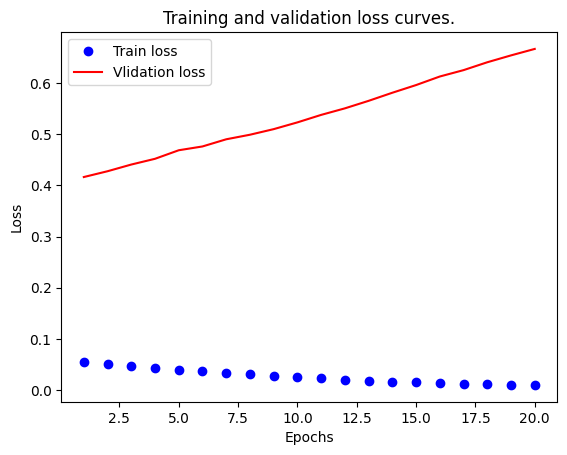

In [51]:
plt.clf()

plt.plot(epochs, loss_values, 'bo', label='Train loss')
plt.plot(epochs, val_loss_values, 'r', label='Vlidation loss')
plt.title('Training and validation loss curves.')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

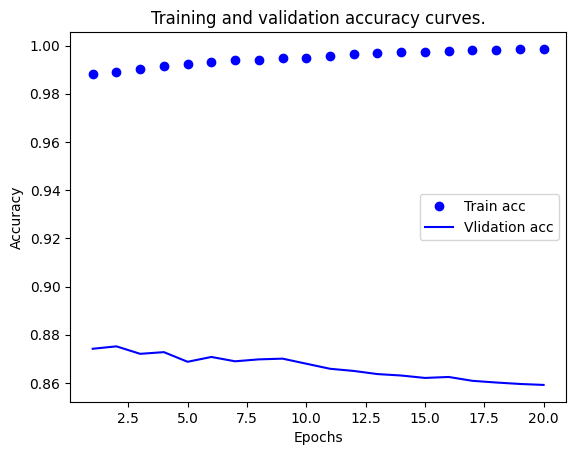

In [52]:
plt.plot(epochs, acc_values, 'bo', label='Train acc')
plt.plot(epochs, val_acc_values, 'b', label='Vlidation acc')
plt.title('Training and validation accuracy curves.')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [53]:
result_eval = model.evaluate(x_test, y_test)
result_eval

782/782 [==============================] - 3s 3ms/step - loss: 0.7526 - binary_accuracy: 0.8414


[0.7525829076766968, 0.8414000272750854]

In [54]:
model.predict(x_test)

782/782 [==============================] - 3s 3ms/step


array([[0.00244743],
       [0.99867296],
       [0.99789256],
       ...,
       [0.00169703],
       [0.01304566],
       [0.9684867 ]], dtype=float32)

In [55]:
model.save('model/nn_movie_review_example01', overwrite=True, save_format='h5')